In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('anime.csv')

# Data Preprocessing

In [3]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [5]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [6]:
data['genre'].fillna('Unknown', inplace=True)
data['type'].fillna('Unknown', inplace=True)

In [7]:
data['rating'].fillna(data['rating'].mean(), inplace=True)

In [8]:
missing_data=data.isnull().sum()

In [9]:
missing_data

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [11]:
data.describe()

,anime_id,rating,members
count,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.017096,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.900000,2.250000e+02
50%,10260.500000,6.550000,1.550000e+03
75%,24794.500000,7.170000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


# Visualisation of data

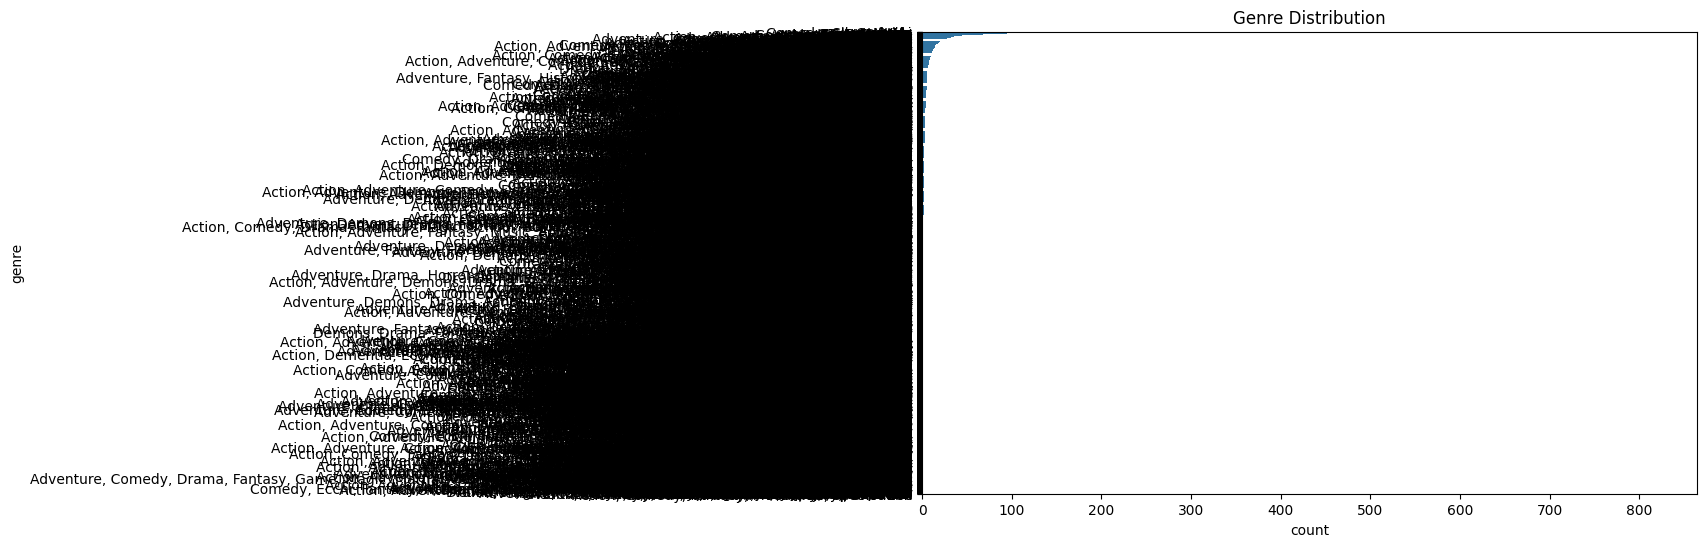

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(y='genre',data=data,order=data['genre'].value_counts().index)
plt.title('Genre Distribution')
plt.show()

as we can see genre has multiple genres per anime so we are we should separate the genres for each anime into individual rows first

In [13]:
  data.genre.value_counts()

,count
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
...,...
"Adventure, Drama, Fantasy, Game, Sci-Fi",1
"Adventure, Demons, Fantasy, Historical",1
"Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen",1


In [14]:
data.genre.unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [15]:
data_genre_split=data.copy()
data_genre_split=data_genre_split.assign(genre=data_genre_split['genre'].str.split(',')).explode('genre')

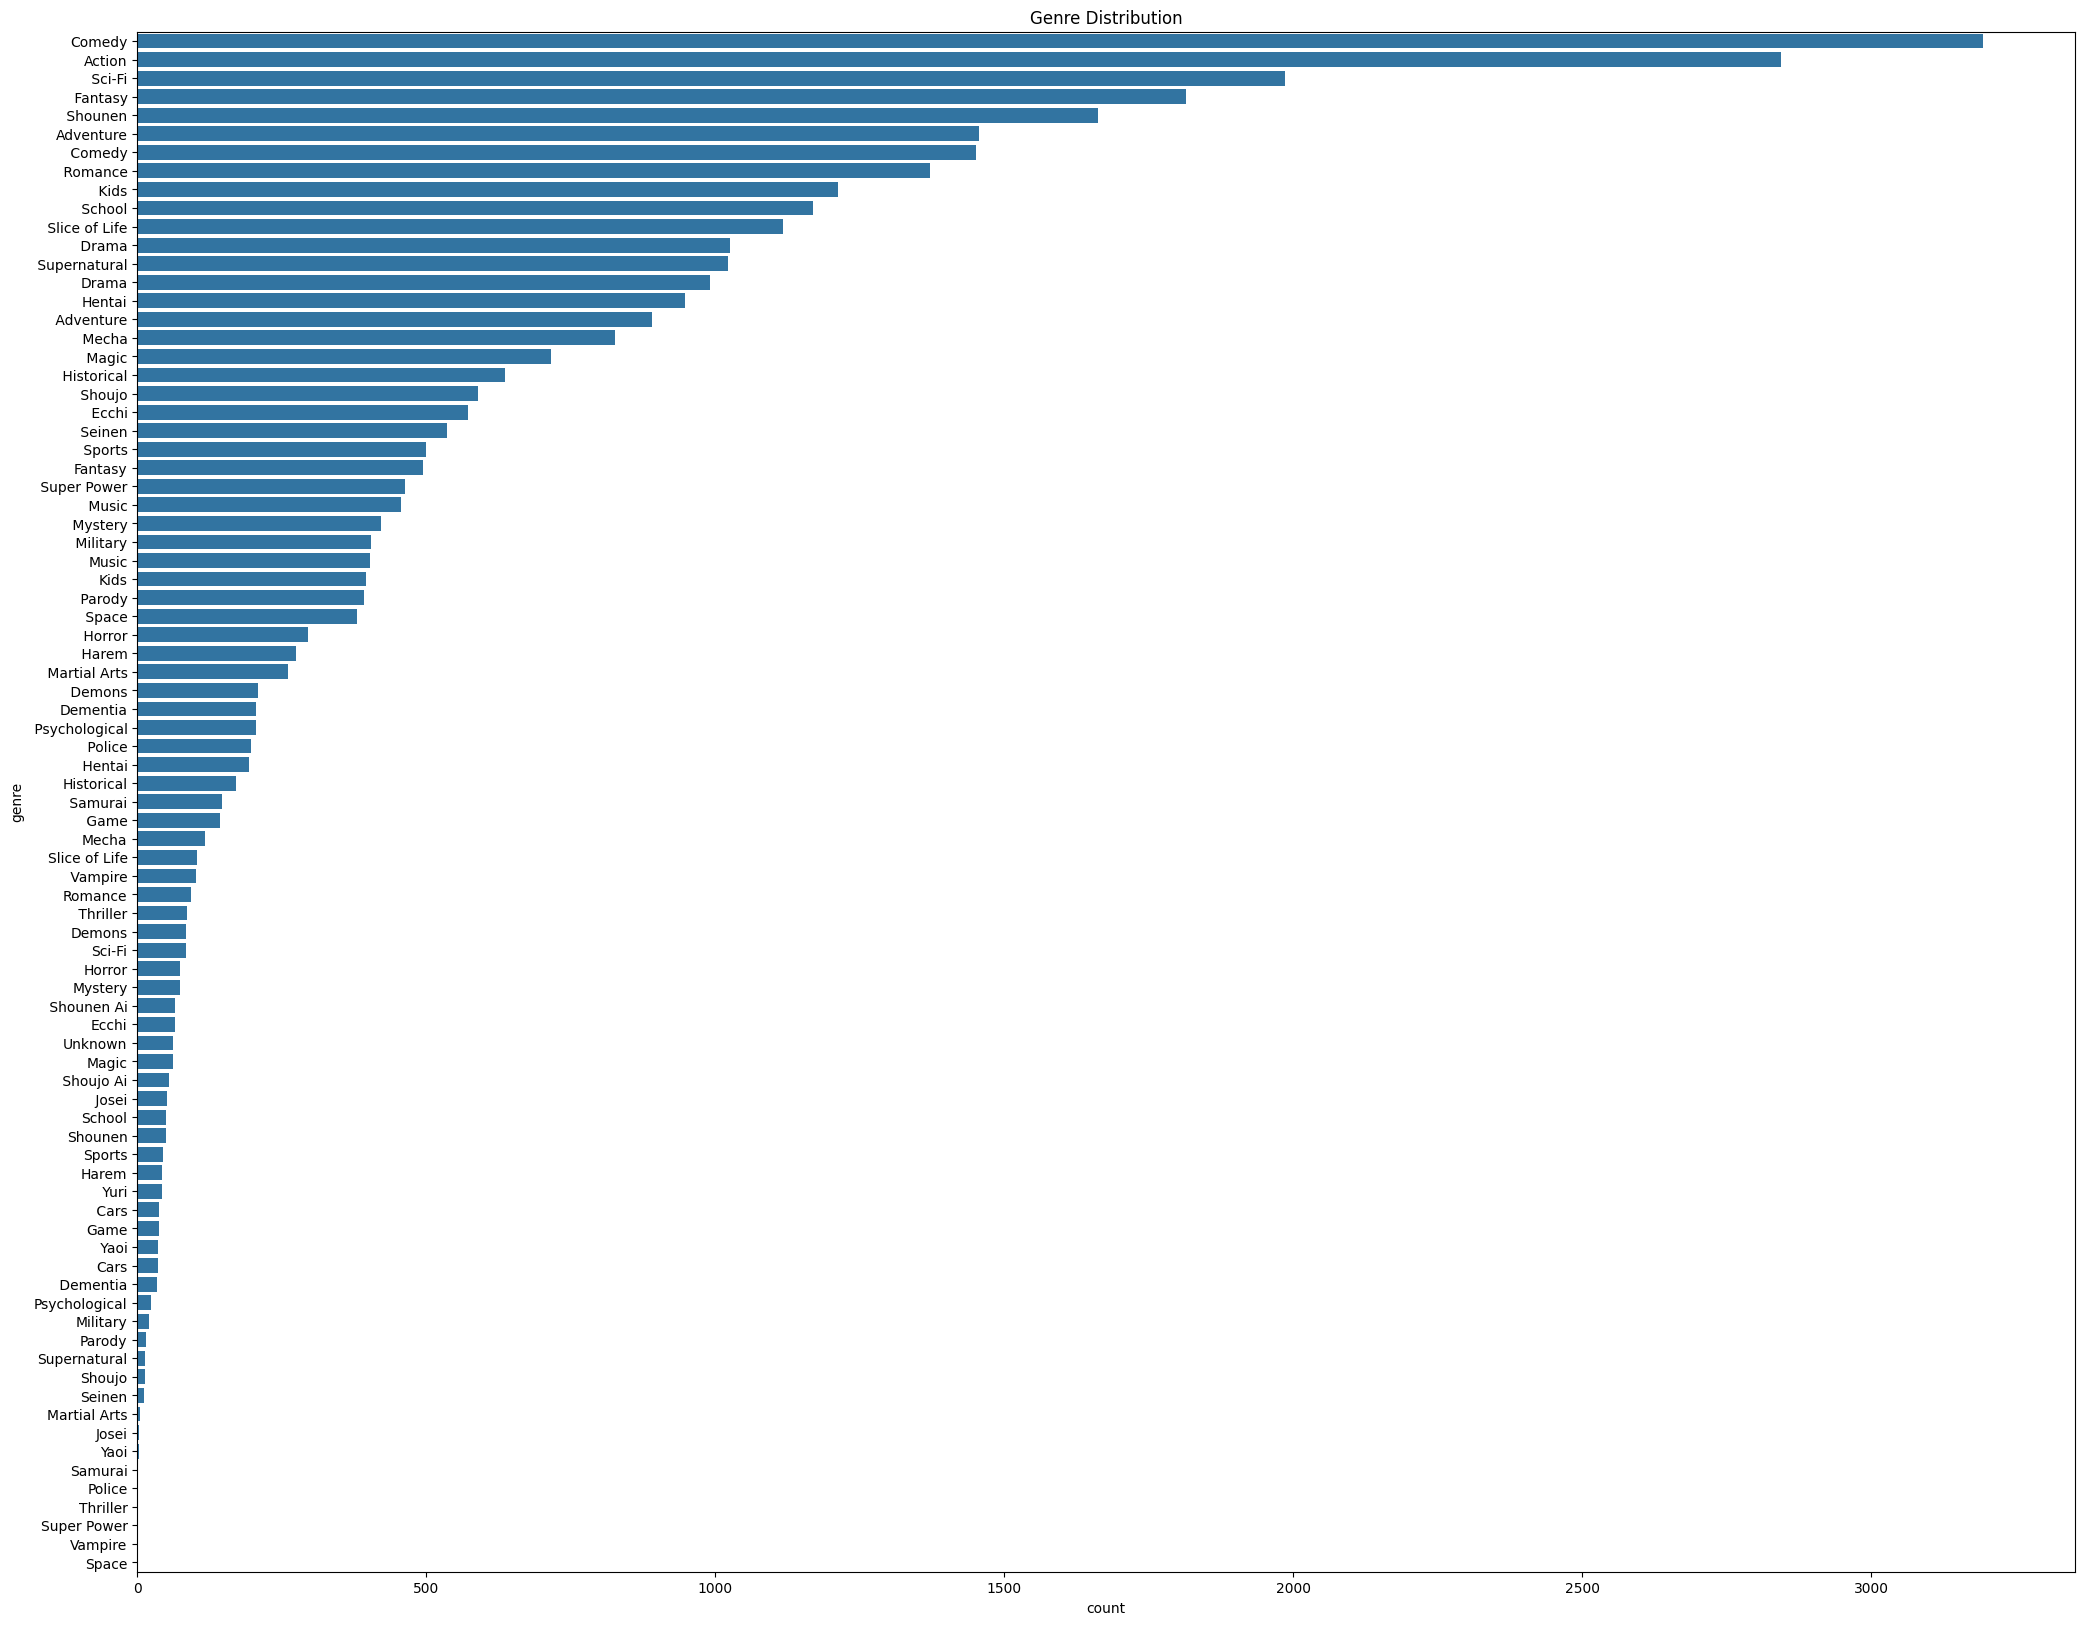

In [16]:
plt.figure(figsize=(25,20))
sns.countplot(y='genre',data=data_genre_split,order=data_genre_split['genre'].value_counts().index)
plt.title('Genre Distribution')
plt.show()

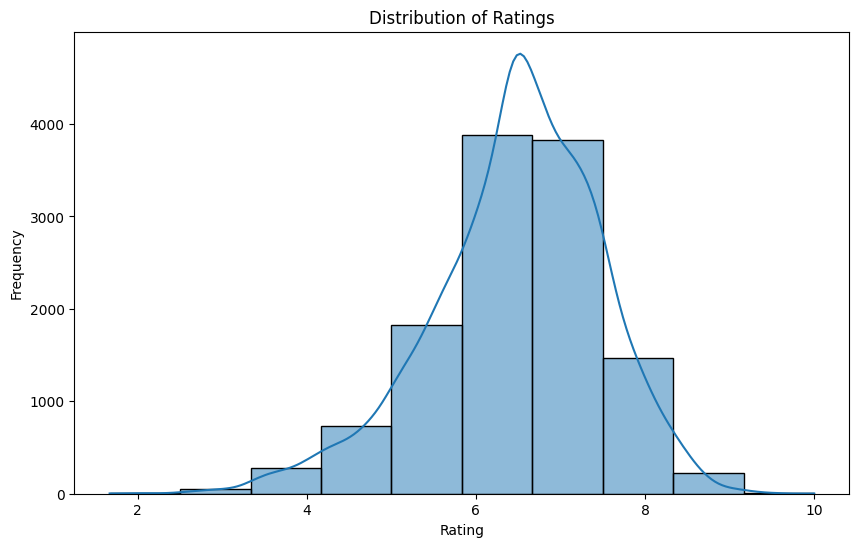

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data['rating'],bins=10,kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

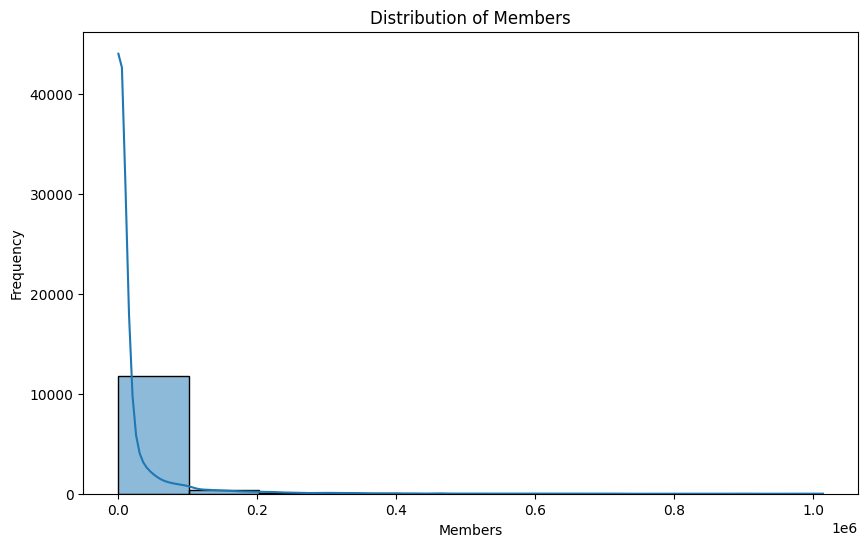

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data['members'],bins=10,kde=True)
plt.title('Distribution of Members')
plt.xlabel('Members')
plt.ylabel('Frequency')
plt.show()

# Feature Extraction

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
data_genre_encoded = pd.get_dummies(data_genre_split, columns=['genre'], prefix='genre', prefix_sep='_', dummy_na=False)

We converting categorical features into numerical representations

In [21]:
data_type_encoded = pd.get_dummies(data['type'], prefix='type')

In [22]:
data_encoded = pd.concat([data, data_genre_encoded, data_type_encoded], axis=1)

In [23]:
data_encoded.drop(['genre', 'type'], axis=1, inplace=True)

We normalized numerical features

In [24]:
scaler = MinMaxScaler()
data_encoded[['rating', 'members']] = scaler.fit_transform(data_encoded[['rating', 'members']])


In [25]:
data_encoded = data_encoded.loc[:, ~data_encoded.columns.duplicated()]

In [26]:
data_encoded = data_encoded.drop_duplicates()

In [27]:
print(data_encoded.head())

   anime_id                              name episodes    rating   members  \
0     32281                    Kimi no Na wa.        1  0.924370  0.197872   
0     32281                    Kimi no Na wa.        1  0.924370  0.197872   
0     32281                    Kimi no Na wa.        1  0.924370  0.197872   
0     32281                    Kimi no Na wa.        1  0.924370  0.197872   
1      5114  Fullmetal Alchemist: Brotherhood       64  0.911164  0.782770   

   genre_ Adventure  genre_ Cars  genre_ Comedy  genre_ Dementia  \
0             False        False          False            False   
0             False        False          False            False   
0             False        False          False            False   
0             False        False          False            False   
1             False        False          False            False   

   genre_ Demons  ...  genre_Unknown  genre_Vampire  genre_Yaoi  type_Movie  \
0          False  ...          False       

# Cosine Similarity and Recommendation Functions

Cosine Similarity: We implemented a function to recommend anime using cosine similarity

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
feature=data_encoded.drop(['anime_id','name','episodes'], axis=1)

In [30]:
cosine_sim=cosine_similarity(feature,feature)

In [31]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = data_encoded[data_encoded['name'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    anime_indices = [i[0] for i in sim_scores]
    return data_encoded['name'].iloc[anime_indices]


In [32]:
recommendations=get_recommendations('Naruto')
print("Recommended Anime:")
print(recommendations)

Recommended Anime:
173                               InuYasha: Kanketsu-hen
252                                      Detective Conan
176                         Kuroshitsuji: Book of Circus
254                                       Diamond no Ace
257         JoJo no Kimyou na Bouken: Stardust Crusaders
357                                      Yowamushi Pedal
367                               School Rumble Ni Gakki
324                                          Gin no Saji
64     JoJo no Kimyou na Bouken: Stardust Crusaders 2...
79                                             Slam Dunk
Name: name, dtype: object


In [33]:
recommendations = get_recommendations("Kimi no Na wa.")
print("Recommendations for 'Kimi no Na wa.':")
print(recommendations)

Recommendations for 'Kimi no Na wa.':
60                                    Hotarubi no Mori e
71                                        Hotaru no Haka
11                                        Koe no Katachi
186                                     Kotonoha no Niwa
102    Mahou Shoujo Madoka★Magica Movie 3: Hangyaku n...
107    Mahou Shoujo Madoka★Magica Movie 2: Eien no Mo...
217    Mahou Shoujo Madoka★Magica Movie 1: Hajimari n...
312    Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...
265                                         Kaze Tachinu
477                                      Death Billiards
Name: name, dtype: object


# Evaluation Metrics

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


In [36]:
def get_recommendations(title, data, cosine_sim, index_mapping):
    if title not in data['name'].values:
        return []
    original_idx = data[data['name'] == title].index[0]
    if original_idx not in index_mapping:
        return []
    idx = index_mapping[original_idx]
    if idx >= len(cosine_sim):
        return []
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    anime_indices = [i[0] for i in sim_scores]
    return data['name'].iloc[anime_indices]



Dividing data set into test and train for evalution

In [37]:
def evaluate_recommendations(train, test, train_sample, cosine_sim_train, index_mapping):
    genre_columns = [col for col in train.columns if col.startswith('genre_')]

    y_true = []
    y_pred = []

    filtered_test = test[test['name'].isin(train_sample['name'])]

    for idx, row in filtered_test.iterrows():
        title = row['name']
        if title in train_sample['name'].values:
            actual_genres = row[genre_columns]
            recommended_animes = get_recommendations(title, train_sample, cosine_sim_train, index_mapping)
            if len(recommended_animes) > 0:
                for rec in recommended_animes:
                    if rec in test['name'].values:
                        rec_genres = test[test['name'] == rec][genre_columns].iloc[0]
                        y_true.append(1 if (actual_genres & rec_genres).sum() > 0 else 0)
                        y_pred.append(1)
                    else:
                        y_true.append(0)
                        y_pred.append(0)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')

In [38]:
train, test = train_test_split(data_encoded, test_size=0.2, random_state=42)

train_sample = train.sample(n=1000, random_state=42)

train_features_sample = train_sample.drop(['anime_id', 'name', 'episodes'], axis=1)

index_mapping = {original_idx: new_idx for new_idx, original_idx in enumerate(train_sample.index)}

train_features_sample = train_features_sample.applymap(lambda x: int(x) if isinstance(x, bool) else x)

train_features_sparse = csr_matrix(train_features_sample.values)

cosine_sim_train = cosine_similarity(train_features_sparse, train_features_sparse)

evaluate_recommendations(train, test, train_sample, cosine_sim_train, index_mapping)


Precision: 0.05986022485566697
Recall: 1.0
F1-Score: 0.11295871559633028


We identified that the system has high recall but low precision. Improvements could involve tuning the similarity threshold, weighting features, or using hybrid approaches.


# Experiment with similarity score thresholds

In [41]:
def get_recommendations(title, cosine_sim, threshold, num_recommendations=10):
    if title not in data_encoded['name'].values:
        return []
    idx = data_encoded[data_encoded['name'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = [score for score in sim_scores if score[1] > threshold]  # Apply threshold
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]
    anime_indices = [i[0] for i in sim_scores]
    return data_encoded['name'].iloc[anime_indices]

# Experimenting with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print(f"Threshold: {threshold}")
    recommendations = get_recommendations("Naruto", cosine_sim, threshold)
    print(f"Recommendations: {recommendations}")


Threshold: 0.1
Recommendations: 173                               InuYasha: Kanketsu-hen
252                                      Detective Conan
176                         Kuroshitsuji: Book of Circus
254                                       Diamond no Ace
257         JoJo no Kimyou na Bouken: Stardust Crusaders
357                                      Yowamushi Pedal
367                               School Rumble Ni Gakki
324                                          Gin no Saji
64     JoJo no Kimyou na Bouken: Stardust Crusaders 2...
79                                             Slam Dunk
Name: name, dtype: object
Threshold: 0.2
Recommendations: 173                               InuYasha: Kanketsu-hen
252                                      Detective Conan
176                         Kuroshitsuji: Book of Circus
254                                       Diamond no Ace
257         JoJo no Kimyou na Bouken: Stardust Crusaders
357                                      Yowamushi Peda

# Interview Questions:

 Can you explain the difference between user-based and item-based collaborative filtering?

User-Based Collaborative Filtering:

User-based collaborative filtering focuses on finding users who have similar tastes and preferences to the target user. Once these similar users are identified, the system aggregates their preferences to recommend items that they have liked but the target user has not interacted with yet.




Item-Based Collaborative Filtering:

Item-based collaborative filtering centers on finding items that are similar to those the target user has interacted with. The system forms item profiles and recommends items that are most similar to those the user has liked.

 What is collaborative filtering, and how does it work?


Collaborative Filtering

Collaborative filtering is a technique used in recommendation systems to make predictions about a user's interests by collecting preferences or taste information from many users. It operates under the assumption that if two users have agreed on items in the past, they are likely to agree again in the future. Similarly, if a user liked an item, they might like similar items that other users who liked the same item also liked.